In [1]:
#This file is analyzed by EDA, mainly drawing the heat diagram of the relationship between activity and time.
import pandas as pd
import numpy as np
import scipy
import datetime
import numexpr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn.metrics import mean_squared_error, r2_score
from math import * 

In [2]:
#Do time-sharing statistics, starting from r1.
#Need an array to count the data every two hours, counting 12 elements, and use dichotomy.
def count_activity(activity):
    count=[0,0,0,0,0,0,0,0,0,0,0,0]
    for i in range(0,len(activity)):
        if(i%2==0):
            hour= int(activity.loc[i]['Datetime'][11])*10+int(activity.loc[i]['Datetime'][12])  
            #print(hour)
            count[hour//2]=count[hour//2]+1
        else:
            hour1=int(activity.loc[i]['Datetime'][11])*10+int(activity.loc[i]['Datetime'][12])
            #print(hour1,i)
            hour2=int(activity.loc[i-1]['Datetime'][11])*10+int(activity.loc[i-1]['Datetime'][12])    
            if(hour1>=hour2): #Not crossing the same day
                timeslot=(hour1-hour2)//2
                for j in range(1,timeslot+1):
                   count[hour2//2+j]+=1
            else: #After twelve o'clock in the evening.
                timeslot=(hour1+24-hour2)//2
                for j in range(1,timeslot+1):
                   count[(hour2//2+j)%12]+=1
            
    return count
R1_work=pd.read_csv('data/R1work_data1.csv')               
R1_work_count= count_activity(R1_work)                 
R1_work_count

[2, 0, 1, 6, 7, 2, 0, 7, 15, 20, 21, 10]

In [3]:
R2_work=pd.read_csv('data/R2work_data.csv') 
#R2_work.loc[70]['Datetime']
R2_work_count= count_activity(R2_work)                 
R2_work_count

[0, 0, 0, 2, 9, 4, 2, 4, 4, 5, 7, 12]

In [4]:
R1_Toilet=pd.read_csv('data/R1_Toilet.csv') 
R1_Toilet_count= count_activity(R1_Toilet)                 
R1_Toilet_count

[4, 4, 8, 19, 9, 2, 2, 0, 0, 2, 2, 8]

In [5]:
R2_Toilet=pd.read_csv('data/R2_Toilet.csv') 
R2_Toilet_count= count_activity(R2_Toilet)                 
R2_Toilet_count

[1, 2, 1, 23, 11, 0, 0, 0, 0, 0, 0, 1]

In [6]:
R1_sleep=pd.read_csv('data/R1_sleep_data.csv') 
R1_sleep_count= count_activity(R1_sleep)                 
R1_sleep_count

[35, 35, 35, 30, 6, 0, 0, 0, 0, 0, 9, 31]

In [7]:
R2_sleep=pd.read_csv('data/R2_sleep_data.csv') 
R2_sleep_count= count_activity(R2_sleep)                 
R2_sleep_count

[33, 34, 34, 31, 4, 0, 0, 0, 0, 1, 9, 31]

In [8]:
Watch_TV=pd.read_csv('data/Watch_tv.csv') 
Watch_TV_count= count_activity(Watch_TV)                 
Watch_TV_count

[0, 0, 0, 0, 3, 5, 5, 4, 8, 13, 7, 3]

In [9]:
Meal=pd.read_csv('data/meal.csv') 
#R2_work.loc[70]['Datetime']
Meal_count= count_activity(Meal)                 
Meal_count

[0, 0, 0, 14, 43, 18, 16, 5, 18, 18, 6, 2]

In [10]:
R1_heal=pd.read_csv('data/R1_heal.csv') 
#R2_work.loc[70]['Datetime']
R1_heal_count= count_activity(R1_heal)                 
R1_heal_count

[0, 0, 1, 18, 17, 1, 1, 0, 1, 2, 3, 1]

In [11]:
R2_heal=pd.read_csv('data/R2_heal.csv') 
#R2_work.loc[70]['Datetime']
R2_heal_count= count_activity(R2_heal)                 
R2_heal_count

[0, 0, 0, 15, 12, 5, 1, 0, 2, 1, 0, 3]

In [21]:
columns = ['R1_work', 'R2_work', 'R1_sleep', 'R2_sleep', 'R1_Toilet','R2_Toilet','R1_hygiene','R2_hygiene','Watch_TV','Meal']

In [22]:
all_activity = pd.DataFrame(data={'R1_work': R1_work_count, 'R2_work': R2_work_count, 'R1_sleep': R1_sleep_count, 'R2_sleep': R2_sleep_count, 'R1_Toilet': R1_Toilet_count, 'R2_Toilet': R2_Toilet_count,'R1_hygiene':R1_heal_count, 'R2_hygiene':R2_heal_count, 'Watch_TV': Watch_TV_count,'Meal':Meal_count})
all_activity.index=['0-1','2-3','4-5','6-7','8-9','10-11','12-13','14-15','16-17','18-19','20-21','22-23']
all_activity

,R1_work,R2_work,R1_sleep,R2_sleep,R1_Toilet,R2_Toilet,R1_hygiene,R2_hygiene,Watch_TV,Meal
0-1,2,0,35,33,4,1,0,0,0,0
2-3,0,0,35,34,4,2,0,0,0,0
4-5,1,0,35,34,8,1,1,0,0,0
6-7,6,2,30,31,19,23,18,15,0,14
8-9,7,9,6,4,9,11,17,12,3,43
10-11,2,4,0,0,2,0,1,5,5,18
12-13,0,2,0,0,2,0,1,1,5,16
14-15,7,4,0,0,0,0,0,0,4,5
16-17,15,4,0,0,0,0,1,2,8,18
18-19,20,5,0,1,2,0,2,1,13,18


In [24]:
all_activity=all_activity.T

Text(0.5, 1.0, 'Heatmap of activities and time slice')

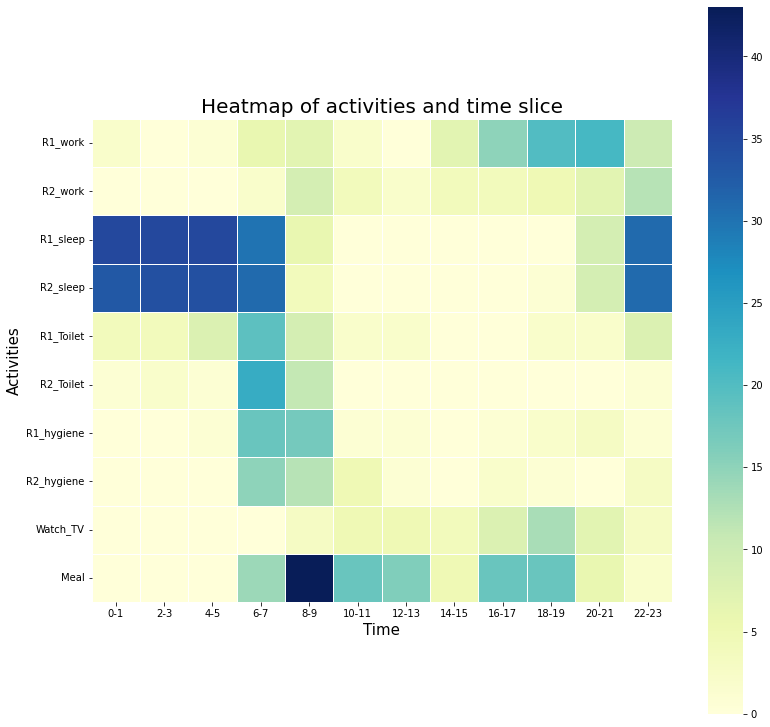

In [27]:
#Heatmap of activities and time slice
sns.set_context({"figure.figsize":(13,13)})
#sns.pivot("month","year","passengers") 
sns.heatmap(data=all_activity,square=True,cmap="YlGnBu",linewidths=.5) 
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Activities", fontsize = 15)
plt.title("Heatmap of activities and time slice", fontsize = 20)

#sns.heatmap(data=all_activity,vmin=200,vmax=500)
#cmap="RdBu_r"